In [8]:
import matplotlib.pyplot as plt
import datajoint as dj
import numpy as np

import seaborn as sns
import pandas as pd
from DMS2_utils import *
from create_trials_df import create_trials_df_from_dj
from dj_utils import return_date_window, ANIMAL_IDS
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df
from datetime import datetime
# from create_summary_table import create_daily_summary_from_dj, lazy_load_daily_summary_df


# settings
%load_ext autoreload
%autoreload 
dj.blob.use_32bit_dims = True # necessary for pd.blob read
sns.set_context("talk")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
date_min, date_max = return_date_window(latest_date=None, n_days_back=20)

In [3]:
flex_date_min = (datetime.today()- timedelta(days=4)).strftime("%Y-%m-%d")
df = create_trials_df_from_dj(date_min=flex_date_min)

fetched 5 sessions for R610 between 2023-05-27 and 2023-05-31
fetched 5 sessions for R611 between 2023-05-27 and 2023-05-31
fetched 5 sessions for R612 between 2023-05-27 and 2023-05-31
fetched 5 sessions for R613 between 2023-05-27 and 2023-05-31
fetched 5 sessions for R614 between 2023-05-27 and 2023-05-31


In [20]:
make_daily_stage_plots(df, overwrite=False)

plotting stage 3 / 4 plot R610 on 2023-05-31
plotting stage 3 / 4 plot R611 on 2023-05-31
plotting stage 3 / 4 plot R612 on 2023-05-31
plotting stage 3 / 4 plot R613 on 2023-05-31
plotting stage 3 / 4 plot R614 on 2023-05-31


In [16]:
days_df = create_days_df_from_dj() #only run if on new computer to create big file
days_df.to_csv('days_df.csv', index=False)

In [18]:
days_df = lazy_load_days_summary_df(
    date_min=flex_date_min, 
    date_max=datetime.today().strftime("%Y-%m-%d"),
    save_out=True
)

Loaded pre-saved df with entries between 2023-05-27 and 2023-05-31.


In [27]:
days_df.reset_index(drop=True, inplace=True)

In [29]:
for animal_id, animal_df in days_df.groupby("animal_id"):
    None

In [30]:
animal_df

,animal_id,date,rigid,n_done_trials,n_sessions,start_time,train_dur_hrs,trial_rate,hit_rate,viol_rate,side_bias,mass,tech,percent_target,pub_volume,rig_volume,volume_target,water_diff
20,R614,2023-05-27,Rig405,67.0,1,07:32:29,1.01,66.34,0.43,0.09,0.37,18.33,ER,4.0,0.552,0.182,0.73,0.004
21,R614,2023-05-28,Rig405,181.0,1,11:07:11,1.03,175.73,0.50,0.04,0.01,18.01,AB,4.0,0.120,0.609,0.72,0.009
22,R614,2023-05-29,Rig405,190.0,1,09:43:06,1.04,182.69,0.56,0.05,0.10,17.66,JL,4.0,0.000,0.714,0.71,0.004
23,R614,2023-05-30,Rig405,179.0,1,10:19:57,1.02,175.49,0.50,0.06,-0.07,17.79,JL,4.0,0.120,0.595,0.71,0.005
24,R614,2023-05-31,Rig405,190.0,1,07:15:00,1.10,172.73,0.50,0.06,0.11,17.93,ER,4.0,0.000,0.801,0.72,0.081


KeyError: 0

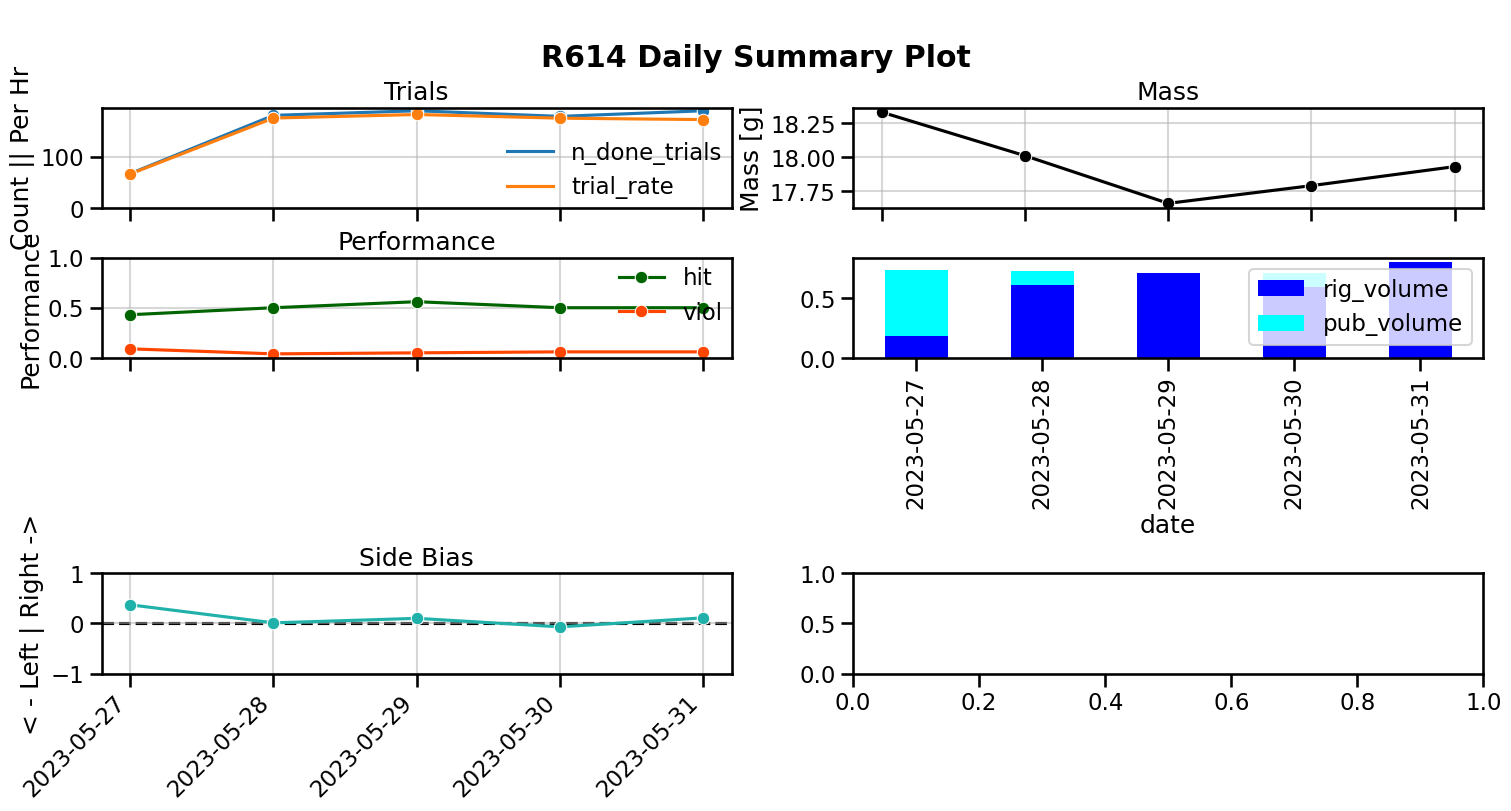

In [31]:
from plot_days_info import *
## Initialize mutli-axis figure
layout = """
    AAABBB
    CCCDDD
    EEEFFF
"""
fig = plt.figure(constrained_layout=True, figsize=(15,8))
ax_dict = fig.subplot_mosaic(layout)  # ax to plot to
plt.suptitle(f"\nR614 Daily Summary Plot", fontweight="semibold")


## Plot
# left column
plot_trials(animal_df, ax_dict["A"], title="Trials", legend=True, xaxis_label=False)
plot_performance(animal_df, ax_dict["C"], title="Performance", xaxis_label=False)
plot_side_bias(animal_df, ax_dict["E"], title="Side Bias", xaxis_label=True)

# right column
plot_mass(animal_df, ax_dict["B"], title="Mass", xaxis_label=False)
plot_water_restriction(animal_df, ax_dict["D"], title="Water", legend=False, xaxis_label=False)
plot_rig_tech(animal_df, ax_dict["F"], title="Rig/Tech", xaxis_label=True)

# plots to add
# stage plot
# time to spoke (or cpoke eventually)
# delay dur
# trial result plot (stacked or unstacked option, unstacked might be better)
# antibias params
## eventually!
# sessions start time
# pre go/ viol off
# settling, pre go, sa, delay, sb, post sb times across days
# give info, sma info, etc (maybe on oneof those dot plots)
# stimulus information

